#Spencer Peterson - 230157543 - Assignment 2
This assignment will be taking in data and doing classification work on it. We will be looking at a dataset for internet traffic and classifying what it is (VoIP, Video Stream, etc.)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
sns.set(style="whitegrid", font_scale=1.50)

In [ ]:
train = pd.read_csv('dataset.csv')

print(train.shape)

(3360, 25)


In [ ]:
train.head()

,ID,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,level
0,27,10345300,10345257,10345174,60,52,5871778,5870638,517262.850000,470235.181800,...,1.022685e+06,4092108,4981436.0,5870764,1257699.719,3435979,4653308.5,5870638,1721563.889,CHAT
1,28,14966353,14966200,14966053,7,0,635321,635242,10502.596490,5615.779737,...,2.134758e+04,-1,0.0,-1,0.000,-1,0.0,-1,0.000,VIDEO-STREAMING
2,29,272867,233627,272820,20303,19353,213324,253467,116813.500000,136410.000000,...,9.018174e+04,-1,0.0,-1,0.000,-1,0.0,-1,0.000,CHAT
3,30,14999391,14998887,14999391,0,0,149034,146556,9062.771601,4758.690038,...,9.995782e+03,-1,0.0,-1,0.000,-1,0.0,-1,0.000,VIDEO-STREAMING
4,31,7190597,7189947,7190597,116,492,6555090,6594711,898743.375000,898824.625000,...,1.582350e+06,7051063,7051063.0,7051063,0.000,6555090,6555090.0,6555090,0.000,CHAT


In [ ]:
missing_values = train.isnull().sum().sort_values(ascending = False)
missing_values

,0
ID,0
max_flowiat,0
std_idle,0
max_idle,0
mean_idle,0
min_idle,0
std_active,0
max_active,0
mean_active,0
min_active,0


As we can see here, there are no null values in our dataset.

In [ ]:
levels = train['level']
levels.unique()

array(['CHAT', 'VIDEO-STREAMING', 'VOIP', 'P2P', 'EMAIL', 'FILE-TRANSFER',
       'BROWSING', 'AUDIO-STREAMING'], dtype=object)

With this, we now have our main categories we are working with:


*   Chat
*   Video Streaming

*   VoIP
*   P2P

*   Email
*   File Transfer

*   Browsing
*   Audio Streaming









#Data Exploration
We will now explore our data and how each feature relates to type of traffic.

##Level and Duration

First we are going to find the mean, median, mode, smallest value, highest value, and range of our duration

In [ ]:
#g = sns.countplot(x='level', hue='duration', data=train)
#plt.legend(loc='upper right')
#g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])

avg_duration = train['duration'].mean()
print(f'average duration: {avg_duration}')
median_duration = train['duration'].median()
print(f'median duration: {median_duration}')
mode_duration = train['duration'].mode()
print(f'mode of duration:\n {mode_duration}')
min_duration = train['duration'].min()
print(f'Lowest duration: {min_duration}')
max_duration = train['duration'].max()
print(f'Highest duration: {max_duration}')
range_duration = train['duration'].max() - train['duration'].min()
print(f'Range of durations: {range_duration}')

#We will try to break our durations down into 3 groups. We will do division to break it down into groups of 3
duration_blocks = avg_duration / 3
print(f'Blocks of duration we will be using: {duration_blocks}')


average duration: 13562111.398214286
median duration: 14973686.5
mode of duration:
 0          47
1          52
2    14972619
3    14999773
4    14999912
Name: duration, dtype: int64
Lowest duration: 42
Highest duration: 14999998
Range of durations: 14999956
Blocks of duration we will be using: 4520703.799404762


As we can see, duration can be very large. In order to make it work easier to read, a new feature will be created called duration category. This will break our duration time into 3 categories: Low, Medium, and High. Below is the creation of this new feature and the graph to show it.

<ipython-input-131-01031d48c6ea>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'EMAIL'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'VIDEO-STREAMING'),
  Text(4, 0, 'AUDIO-STREAMING'),
  Text(5, 0, 'P2P'),
  Text(6, 0, 'FILE-TRANSFER'),
  Text(7, 0, 'BROWSING')])

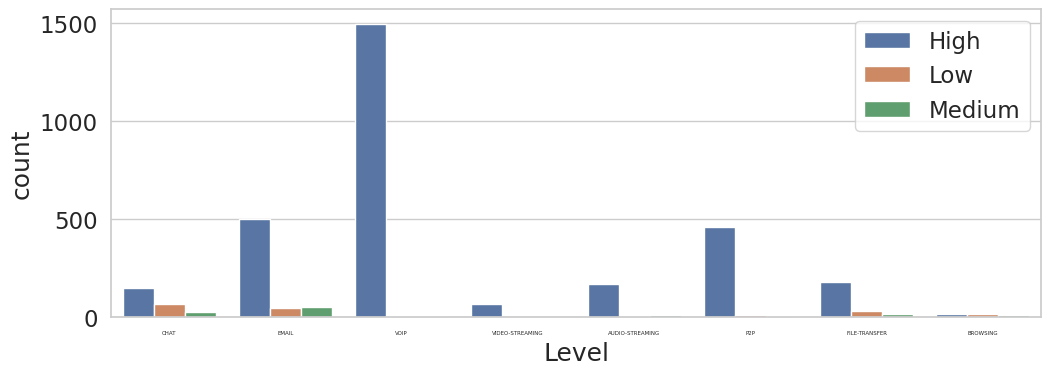

In [ ]:
def duration_category(duration):
  if 0 < duration and duration <= 4520703.8:
    return 'Low'
  elif 4520703.8 < duration and duration <= 9041407.6:
    return 'Medium'
  else:
    return 'High'

train['duration_category'] = train['duration'].apply(duration_category)
g = sns.countplot(x='level', hue='duration_category', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
#g.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xticks(fontsize=4)


In [ ]:
duration_pivot_table = train.pivot_table(index='level', columns='duration_category', aggfunc='size')

duration_pivot_table

duration_category,High,Low,Medium
level,,,
AUDIO-STREAMING,16,17,13
BROWSING,178,30,19
CHAT,148,66,29
EMAIL,169,5,12
FILE-TRANSFER,461,12,7
P2P,68,2,1
VIDEO-STREAMING,500,48,50
VOIP,1497,6,6


With this info, we can see that browsing does not have the longest durations of traffic. VoIP has the highest duration of traffic, with Email and P2P being second and third highest. Chats, Email, File Transfer, and Browsing are the only types of traffic that have visible medium and low durations.

##Level and Min/Max Fiat

Here, we will visualize the level, compared to the minimum and maximum time packets are sent forward between locations.

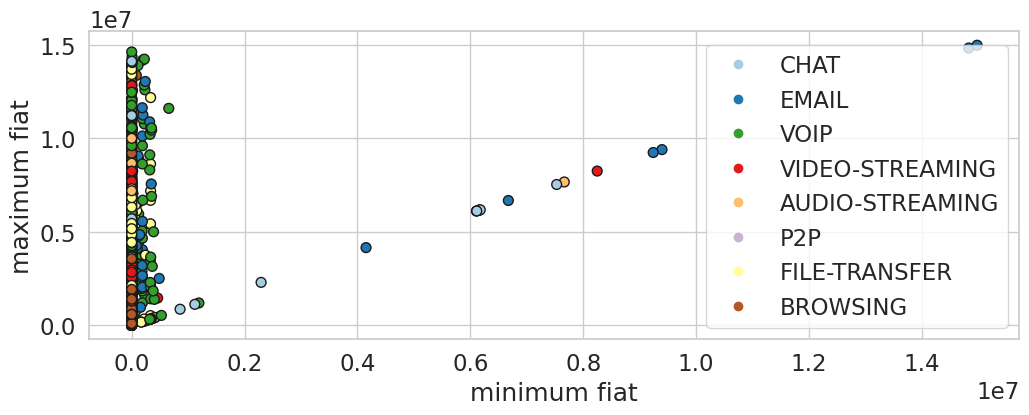

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

min_max_X = train[['min_fiat', 'max_fiat']]
min_max_y = train['level']
#Encode levels in order to make points in scatter plot color coded
encoder = LabelEncoder()
level_encoded = encoder.fit_transform(min_max_y)
# Plot also the training points
# Use array indexing instead of .iloc for NumPy arrays
p1 = plt.scatter(min_max_X['min_fiat'], min_max_X['max_fiat'], c=level_encoded,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('minimum fiat')
plt.ylabel('maximum fiat')
plt.legend(handles=p1.legend_elements()[0], labels=['CHAT', 'EMAIL', 'VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING', 'P2P', 'FILE-TRANSFER', 'BROWSING'], loc='lower right')

Based on this, it looks like majority of data points have a low fiat, but a high fiat. The ones that seem to have a larger minimum fiat are emails, chats, one VoIP, one audio-streaming, and one video-streaming. Let's now look at it when compared to duration and mean-fiat

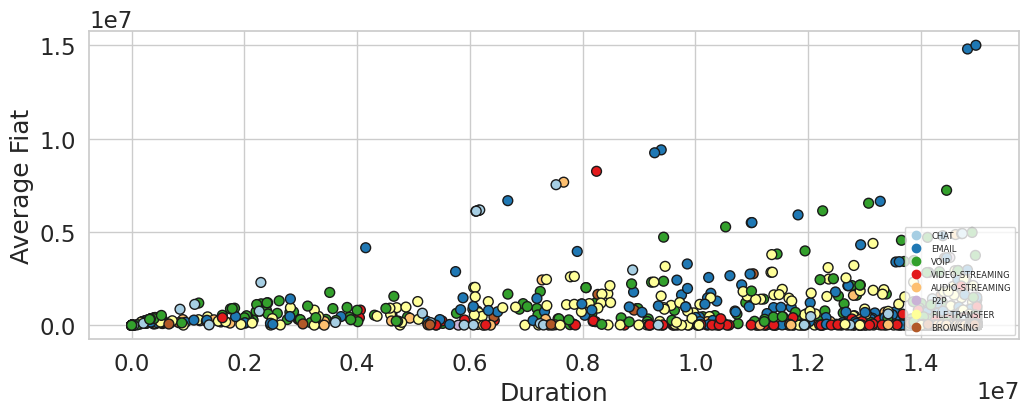

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

traffic_X = train[['mean_fiat', 'duration']]
traffic_y = train['level']
#Encode levels in order to make points in scatter plot color coded
encoder = LabelEncoder()
level_encoded = encoder.fit_transform(traffic_y)
# Plot also the training points
# Use array indexing instead of .iloc for NumPy arrays
p1 = plt.scatter(traffic_X['duration'], traffic_X['mean_fiat'], c=level_encoded,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Duration')
plt.ylabel('Average Fiat')
plt.legend(handles=p1.legend_elements()[0], labels=['CHAT', 'EMAIL', 'VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING', 'P2P', 'FILE-TRANSFER', 'BROWSING'], loc='lower right', prop={'size': 6})

It looks like the lower the average fiat, the longer the duration. Also, email appears to have the highest average fiat as duration increases.

##Average Active and Idle Times with Duration regarding Level

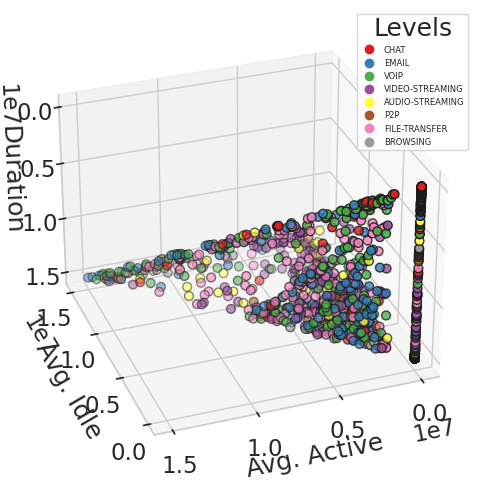

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

traffic_X = train[['mean_active', 'mean_idle', 'duration']]
traffic_y = train['level']
#Encode levels in order to make points in scatter plot color coded
encoder = LabelEncoder()
level_encoded = encoder.fit_transform(traffic_y)

ax.set_xlabel("Avg. Active")
ax.set_ylabel("Avg. Idle")
ax.set_zlabel("Duration")
# Plot the data points
p1 = ax.scatter(
    traffic_X['mean_idle'],
    traffic_X['mean_active'],
    traffic_X['duration'],
    c=level_encoded,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40
)

# Add a legend
legend_labels = ['CHAT', 'EMAIL', 'VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING', 'P2P', 'FILE-TRANSFER', 'BROWSING']
legend = ax.legend(handles=p1.legend_elements()[0], labels=legend_labels, loc="upper right", title="Levels", prop={'size': 6})

plt.show()

As we can see, the majority of data points are bunched together in large chunks. This does make it harder to find correlation in some areas. However, there is a noticeable straight line around the zero mark for average active.

##Level and Fiat/Duration

We will now see average fiat and duration corresponds with level. To do this we will do a cat plot. the dots indicate low, medium, or high duration, the y axis is the average fiat, and the x value is the level.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'VIDEO-STREAMING'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'P2P'),
  Text(4, 0, 'EMAIL'),
  Text(5, 0, 'FILE-TRANSFER'),
  Text(6, 0, 'BROWSING'),
  Text(7, 0, 'AUDIO-STREAMING')])

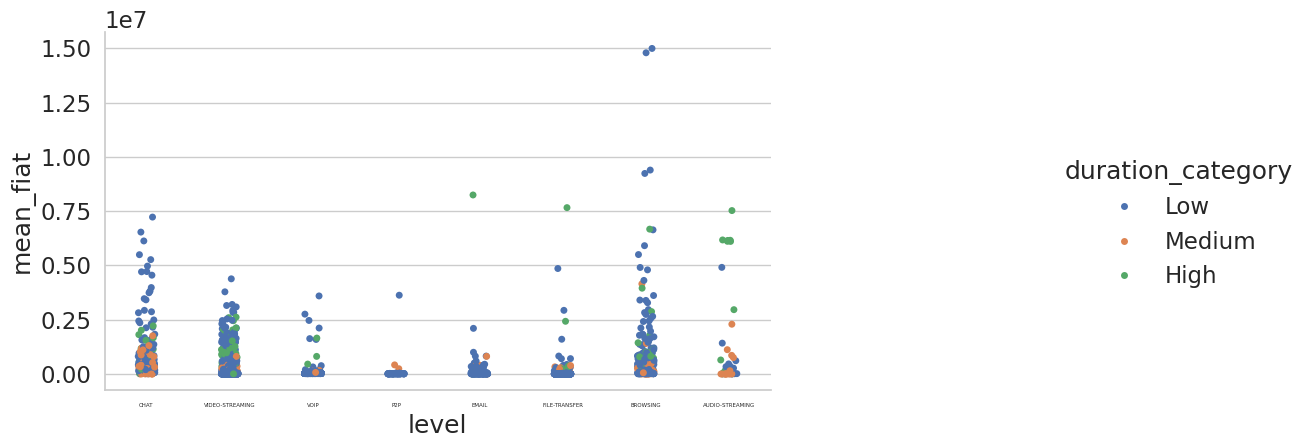

In [ ]:
g = sns.catplot(y="mean_fiat", x="level", hue="duration_category", data=train)

new_labels = ['Low', 'Medium', 'High']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)
plt.xticks(fontsize=4)

With this, we can see that chats have a lot of medium duration but a lower average fiat, email has a lot of low duration traffic with usually smaller average fiats. Video streaming has a lot more noticeable higher duration traffic, but wtill with not a high average fiat. Browsing appears to have the highest average fiats, but still mostly lower durations of traffic.

Let's now try another graph to look into the average biat and duration

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'VIDEO-STREAMING'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'P2P'),
  Text(4, 0, 'EMAIL'),
  Text(5, 0, 'FILE-TRANSFER'),
  Text(6, 0, 'BROWSING'),
  Text(7, 0, 'AUDIO-STREAMING')])

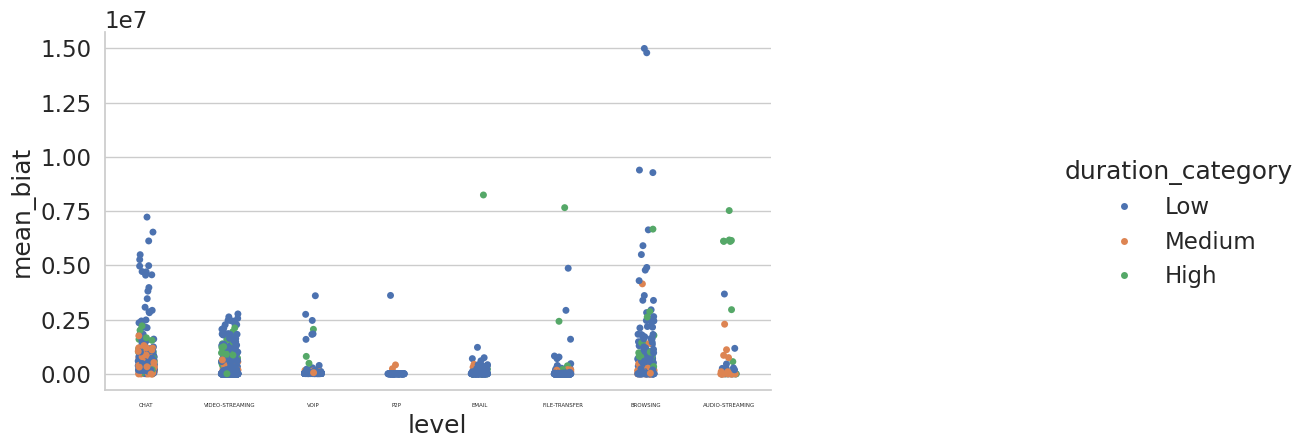

In [ ]:
g = sns.catplot(y="mean_biat", x="level", hue="duration_category", data=train)

new_labels = ['Low', 'Medium', 'High']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)
plt.xticks(fontsize=4)

It looks similar to fiat, however, chat's low duration points appear slightly different than it did in fiat.

##Level and total fiat and biat

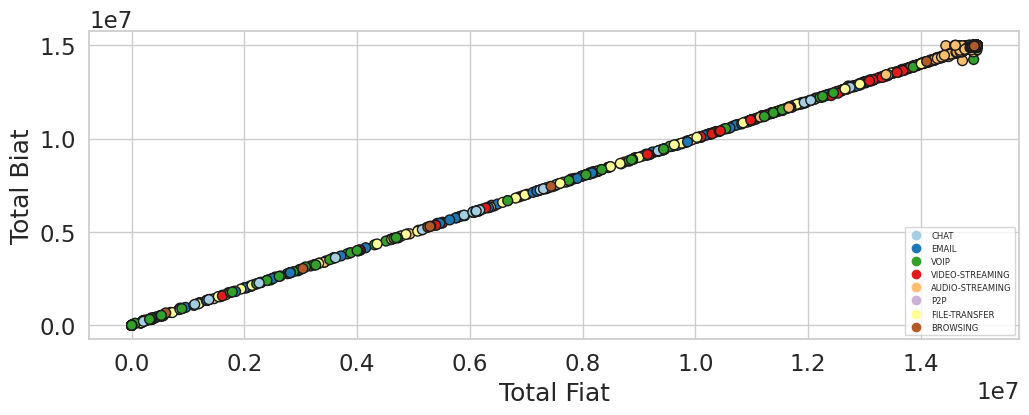

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

traffic_X = train[['total_fiat', 'total_biat']]
traffic_y = train['level']
#Encode levels in order to make points in scatter plot color coded
encoder = LabelEncoder()
level_encoded = encoder.fit_transform(traffic_y)
# Plot also the training points
# Use array indexing instead of .iloc for NumPy arrays
p1 = plt.scatter(traffic_X['total_fiat'], traffic_X['total_biat'], c=level_encoded,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Total Fiat')
plt.ylabel('Total Biat')
plt.legend(handles=p1.legend_elements()[0], labels=['CHAT', 'EMAIL', 'VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING', 'P2P', 'FILE-TRANSFER', 'BROWSING'], loc='lower right', prop={'size': 6})

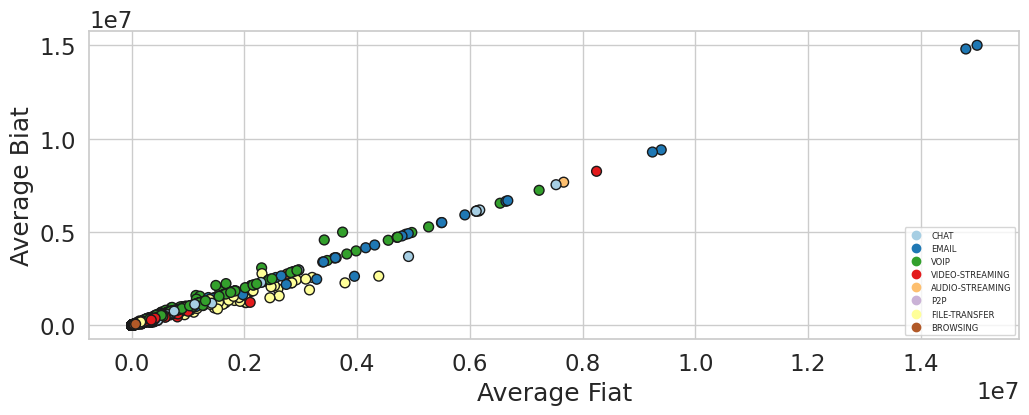

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

traffic_X = train[['mean_fiat', 'mean_biat']]
traffic_y = train['level']
#Encode levels in order to make points in scatter plot color coded
encoder = LabelEncoder()
level_encoded = encoder.fit_transform(traffic_y)
# Plot also the training points
# Use array indexing instead of .iloc for NumPy arrays
p1 = plt.scatter(traffic_X['mean_fiat'], traffic_X['mean_biat'], c=level_encoded,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Average Fiat')
plt.ylabel('Average Biat')
plt.legend(handles=p1.legend_elements()[0], labels=['CHAT', 'EMAIL', 'VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING', 'P2P', 'FILE-TRANSFER', 'BROWSING'], loc='lower right', prop={'size': 6})

One thing to note is how there are noticeable file transfer data points shown for average fiat and biat than there was for total fiat and biat. However, in the measure of total fiat and biat, audio streaming had a noticeable cluster at the highest point for total fiat and biat on the graph.

##Flow Bytes per Second and Level

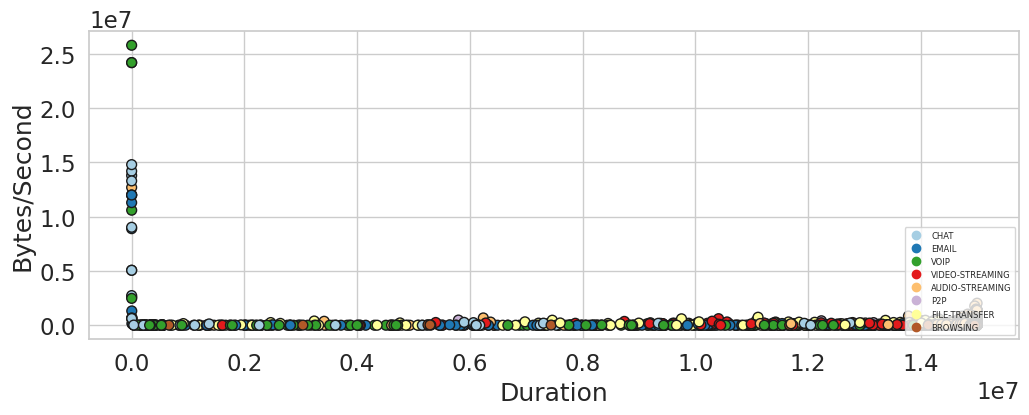

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

traffic_X = train[['flowBytesPerSecond', 'duration']]
traffic_y = train['level']
#Encode levels in order to make points in scatter plot color coded
encoder = LabelEncoder()
level_encoded = encoder.fit_transform(traffic_y)
# Plot also the training points
# Use array indexing instead of .iloc for NumPy arrays
p1 = plt.scatter(traffic_X['duration'], traffic_X['flowBytesPerSecond'], c=level_encoded,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Duration')
plt.ylabel('Bytes/Second')
plt.legend(handles=p1.legend_elements()[0], labels=['CHAT', 'EMAIL', 'VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING', 'P2P', 'FILE-TRANSFER', 'BROWSING'], loc='lower right', prop={'size': 6})

As we can see, as duration increases, the flow of bytes per second lowers.

##Breaking Fiat, Biat, Flowiat, Active, and Idle into Categories

With how there are a lot of different features, many of them having a wide variety of values for them, to make it easier to process, we will use feature engineering to break some of these features into categories of Low, Medium, and High, in order to better visualize the data.

In [ ]:
train['fiat_category'] = pd.cut(train['total_fiat'], bins=3, labels=['Low','Medium','High'])
train['biat_category'] = pd.cut(train['total_biat'], bins=3, labels=['Low','Medium','High'])
train['flowiat_category'] = pd.cut(train['mean_flowiat'], bins=3, labels=['Low','Medium','High'])
train['active_category'] = pd.cut(train['mean_active'], bins=3, labels=['Low','Medium','High'])
train['idle_category'] = pd.cut(train['mean_idle'], bins=3, labels=['Low','Medium','High'])

train[['fiat_category','biat_category','flowiat_category','active_category','idle_category']].head()

,fiat_category,biat_category,flowiat_category,active_category,idle_category
0,High,High,Low,Low,Low
1,High,High,Low,Low,Low
2,Low,Low,Low,Low,Low
3,High,High,Low,Low,Low
4,Medium,Medium,Low,Medium,Medium


##Visualizing Fiat Category

<ipython-input-142-98c261897766>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])


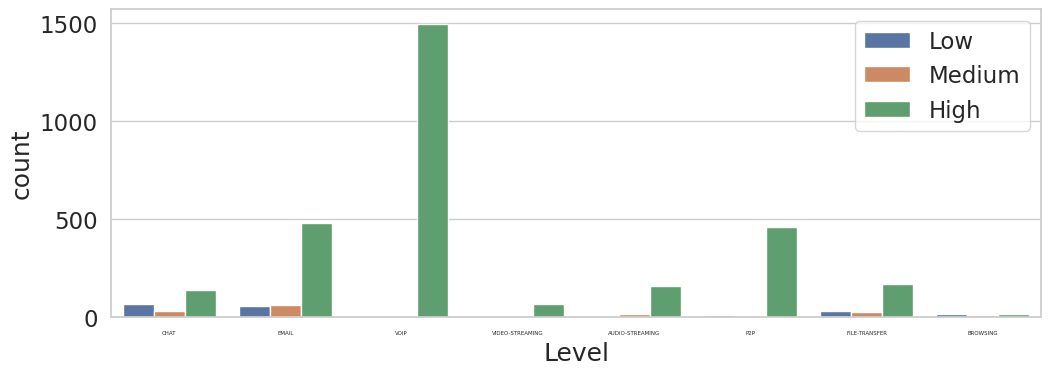

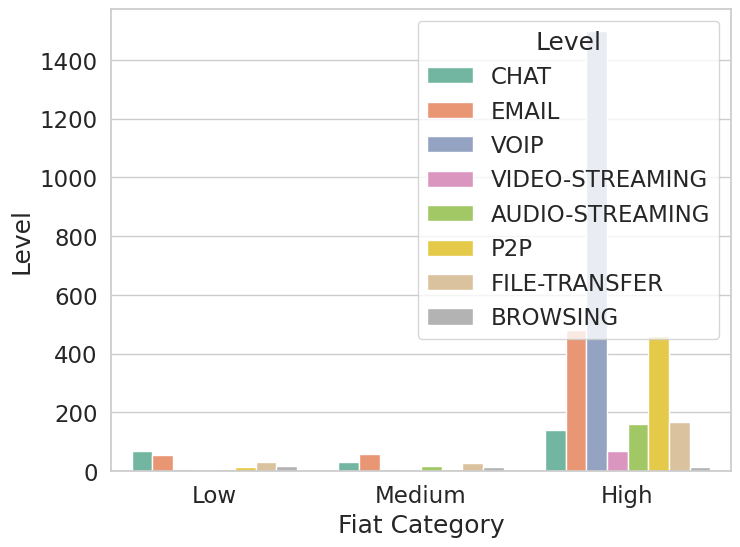

In [ ]:
g = sns.countplot(x='level', hue='fiat_category', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
#g.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xticks(fontsize=4)

plt.figure(figsize=(8, 6))
sns.countplot(x='fiat_category', hue='level', data=train, palette='Set2')
plt.xlabel('Fiat Category')
plt.ylabel('Level')
plt.legend(title='Level', loc='upper right', labels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'VIDEO-STREAMING'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'P2P'),
  Text(4, 0, 'EMAIL'),
  Text(5, 0, 'FILE-TRANSFER'),
  Text(6, 0, 'BROWSING'),
  Text(7, 0, 'AUDIO-STREAMING')])

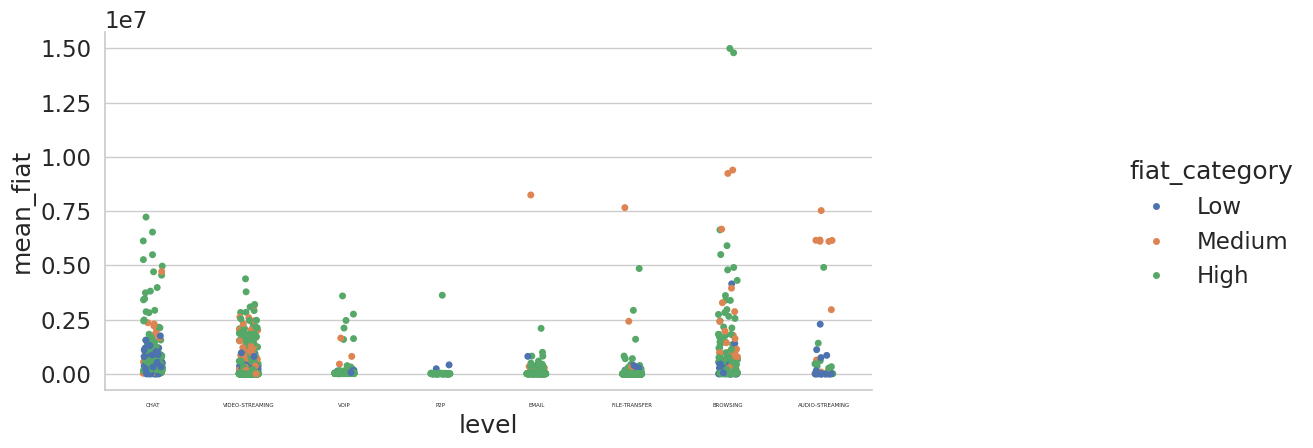

In [ ]:
g = sns.catplot(y="mean_fiat", x="level", hue="fiat_category", data=train)

new_labels = ['Low', 'Medium', 'High']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)
plt.xticks(fontsize=4)

In [ ]:
fiat_pivot_table = train.pivot_table(index='level', columns='fiat_category', aggfunc='size')

fiat_pivot_table

<ipython-input-144-21a49129ac94>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fiat_pivot_table = train.pivot_table(index='level', columns='fiat_category', aggfunc='size')


fiat_category,Low,Medium,High
level,,,
AUDIO-STREAMING,17,14,15
BROWSING,30,29,168
CHAT,70,32,141
EMAIL,6,18,162
FILE-TRANSFER,14,6,460
P2P,2,1,68
VIDEO-STREAMING,56,60,482
VOIP,6,6,1497


Here, we can see that the higher fiat gets, the more likely it is to be VoIP. Email has the second highest fiat, and P2P is the third highest.

It is important to note that browsing has the highest fiat in total.

##Visualizing Biat Category

<ipython-input-145-eefec7e7e861>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])


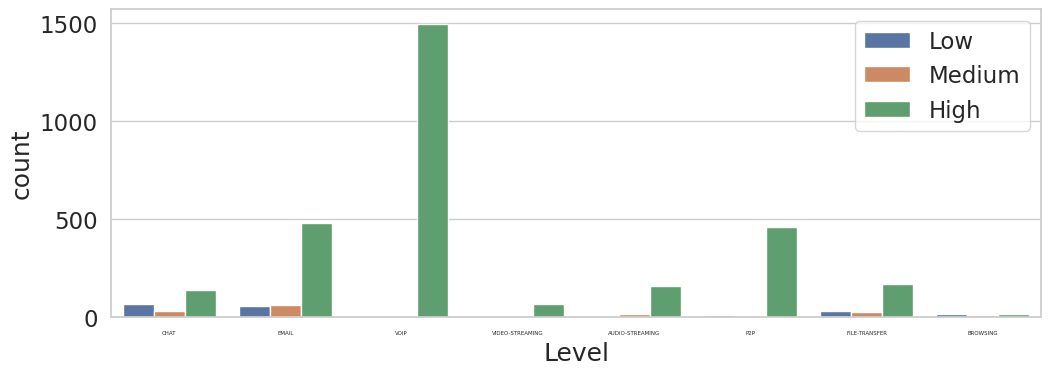

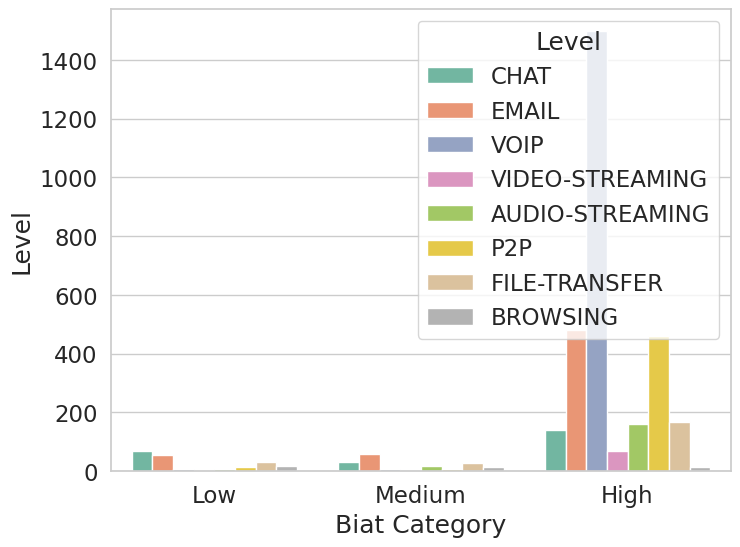

In [ ]:
g = sns.countplot(x='level', hue='biat_category', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
#g.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xticks(fontsize=4)

plt.figure(figsize=(8, 6))
sns.countplot(x='biat_category', hue='level', data=train, palette='Set2')
plt.xlabel('Biat Category')
plt.ylabel('Level')
plt.legend(title='Level', loc='upper right', labels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'VIDEO-STREAMING'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'P2P'),
  Text(4, 0, 'EMAIL'),
  Text(5, 0, 'FILE-TRANSFER'),
  Text(6, 0, 'BROWSING'),
  Text(7, 0, 'AUDIO-STREAMING')])

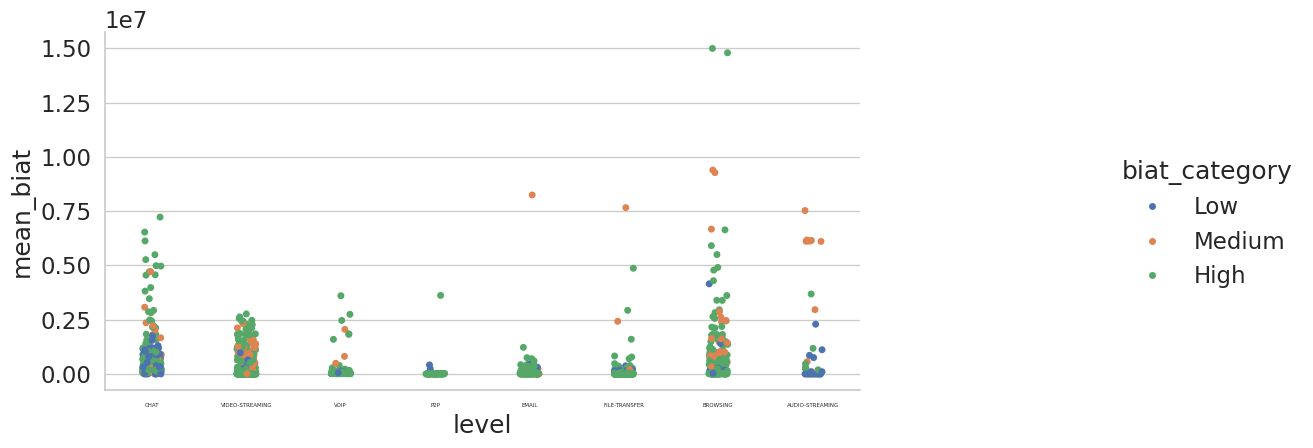

In [ ]:
g = sns.catplot(y="mean_biat", x="level", hue="biat_category", data=train)

new_labels = ['Low', 'Medium', 'High']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)
plt.xticks(fontsize=4)

In [ ]:
biat_pivot_table = train.pivot_table(index='level', columns='biat_category', aggfunc='size')

biat_pivot_table

<ipython-input-147-f648f3c5dbfd>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  biat_pivot_table = train.pivot_table(index='level', columns='biat_category', aggfunc='size')


biat_category,Low,Medium,High
level,,,
AUDIO-STREAMING,17,14,15
BROWSING,30,29,168
CHAT,70,32,141
EMAIL,6,18,162
FILE-TRANSFER,14,6,460
P2P,2,1,68
VIDEO-STREAMING,56,60,482
VOIP,6,6,1497


As we can see, biat appears to look very similar to fiat in regards to visualizing the data.

##Visualizing Flowiat Category

<ipython-input-148-7aa2317eb338>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])


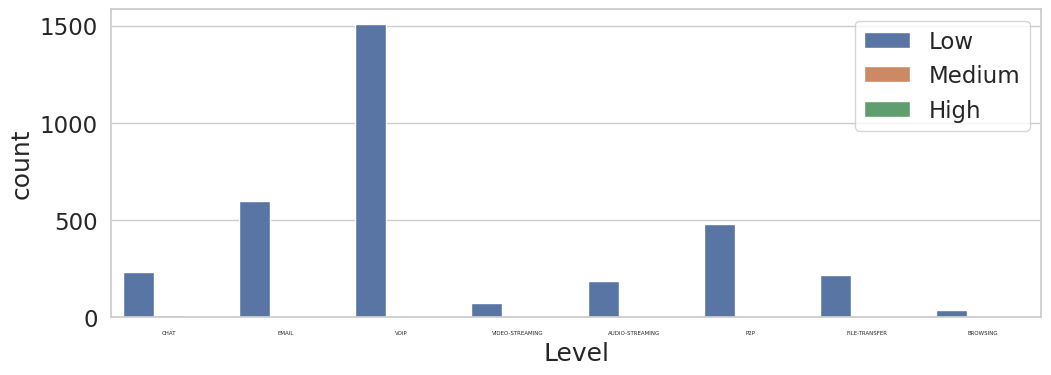

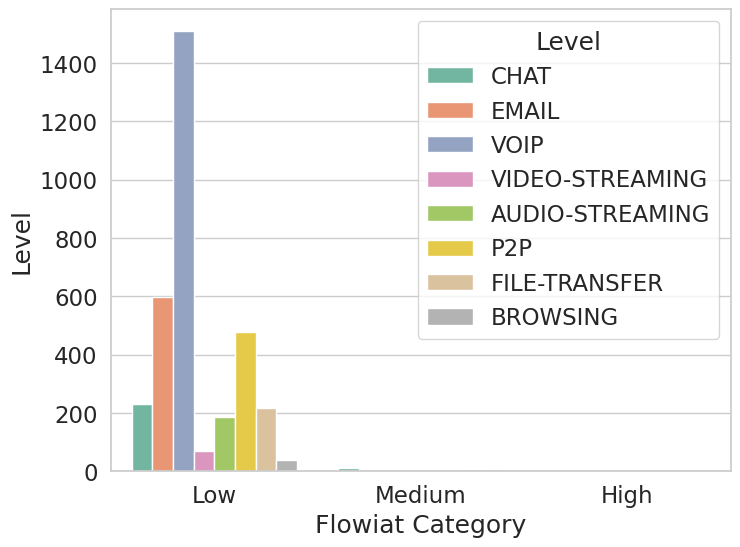

In [ ]:
g = sns.countplot(x='level', hue='flowiat_category', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
#g.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xticks(fontsize=4)

plt.figure(figsize=(8, 6))
sns.countplot(x='flowiat_category', hue='level', data=train, palette='Set2')
plt.xlabel('Flowiat Category')
plt.ylabel('Level')
plt.legend(title='Level', loc='upper right', labels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'VIDEO-STREAMING'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'P2P'),
  Text(4, 0, 'EMAIL'),
  Text(5, 0, 'FILE-TRANSFER'),
  Text(6, 0, 'BROWSING'),
  Text(7, 0, 'AUDIO-STREAMING')])

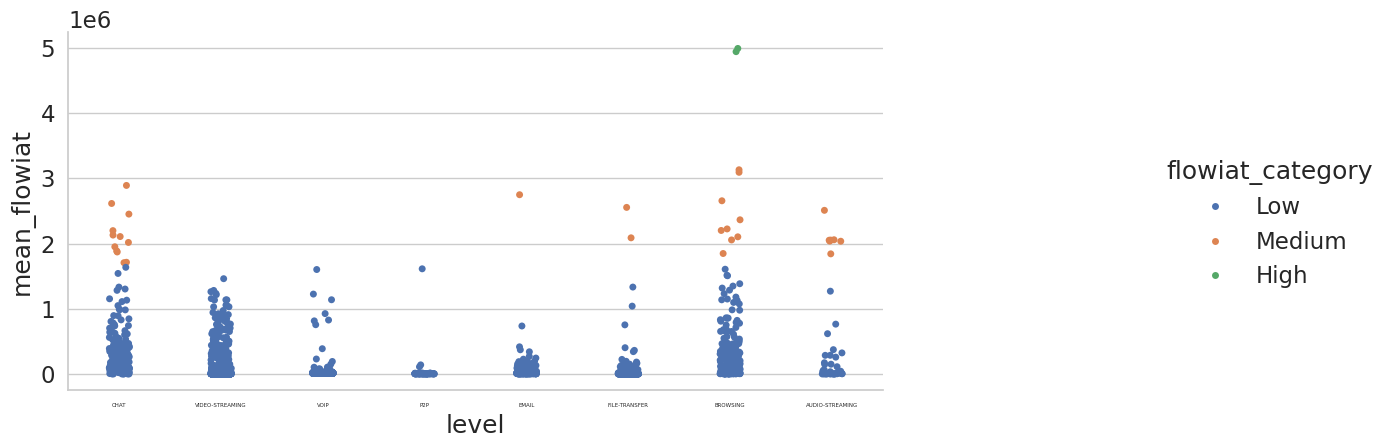

In [ ]:
g = sns.catplot(y="mean_flowiat", x="level", hue="flowiat_category", data=train)

new_labels = ['Low', 'Medium', 'High']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)
plt.xticks(fontsize=4)

In [ ]:
flowiat_pivot_table = train.pivot_table(index='level', columns='flowiat_category', aggfunc='size')

flowiat_pivot_table

<ipython-input-150-91b95b2811d2>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flowiat_pivot_table = train.pivot_table(index='level', columns='flowiat_category', aggfunc='size')


flowiat_category,Low,Medium,High
level,,,
AUDIO-STREAMING,39,7,0
BROWSING,216,9,2
CHAT,231,12,0
EMAIL,185,1,0
FILE-TRANSFER,478,2,0
P2P,71,0,0
VIDEO-STREAMING,598,0,0
VOIP,1509,0,0


Note that browsing is the only level of internet traffic that actually has noticeable high flowiat as the mean flowiat increases

##Visualizing Active Category

<ipython-input-151-79a76ff014b4>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])


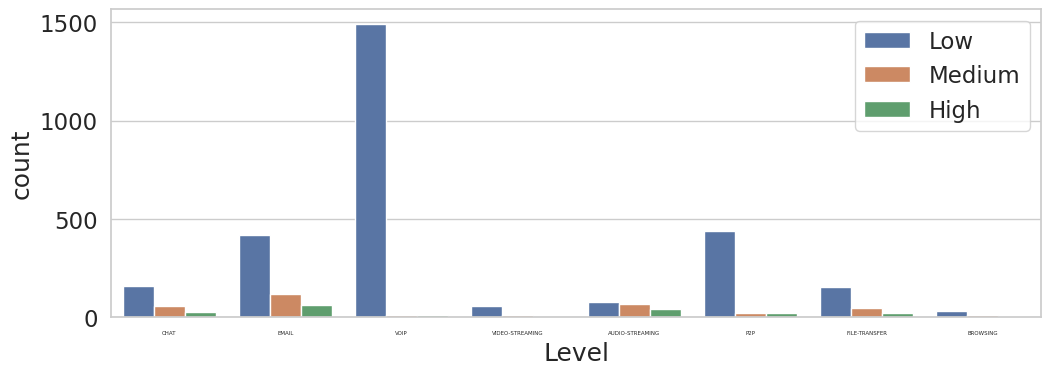

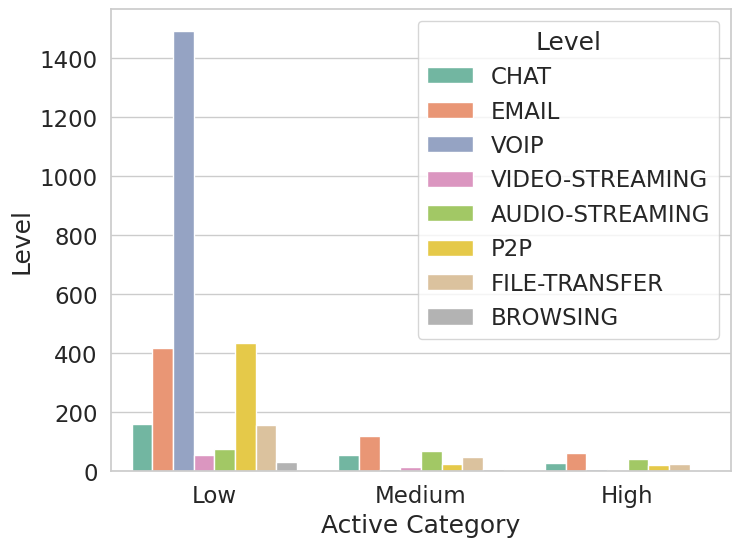

In [ ]:
g = sns.countplot(x='level', hue='active_category', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
#g.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xticks(fontsize=4)

plt.figure(figsize=(8, 6))
sns.countplot(x='active_category', hue='level', data=train, palette='Set2')
plt.xlabel('Active Category')
plt.ylabel('Level')
plt.legend(title='Level', loc='upper right', labels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'VIDEO-STREAMING'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'P2P'),
  Text(4, 0, 'EMAIL'),
  Text(5, 0, 'FILE-TRANSFER'),
  Text(6, 0, 'BROWSING'),
  Text(7, 0, 'AUDIO-STREAMING')])

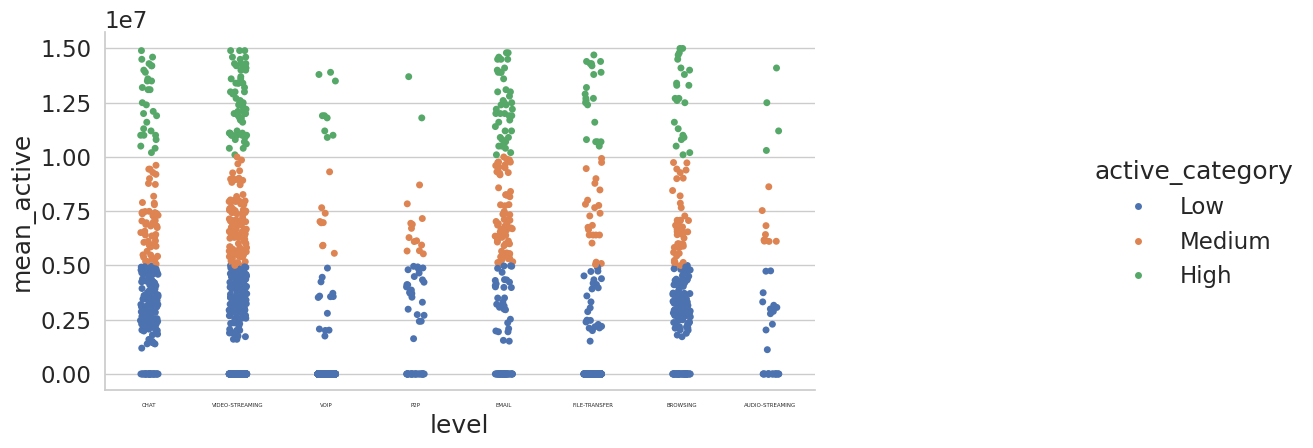

In [ ]:
g = sns.catplot(y="mean_active", x="level", hue="active_category", data=train)

new_labels = ['Low', 'Medium', 'High']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)
plt.xticks(fontsize=4)

In [ ]:
active_pivot_table = train.pivot_table(index='level', columns='active_category', aggfunc='size')

active_pivot_table

<ipython-input-153-a51c25c3c034>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  active_pivot_table = train.pivot_table(index='level', columns='active_category', aggfunc='size')


active_category,Low,Medium,High
level,,,
AUDIO-STREAMING,33,9,4
BROWSING,156,48,23
CHAT,159,55,29
EMAIL,75,69,42
FILE-TRANSFER,436,23,21
P2P,56,13,2
VIDEO-STREAMING,416,120,62
VOIP,1491,9,9


It looks like VoIP and P2P have the fewest looking data points in active categories, while video streaming has the most dense amount of data points, primarily in the medium category.

##Visualizing Idle Category

<ipython-input-154-2eaf559b50f2>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])


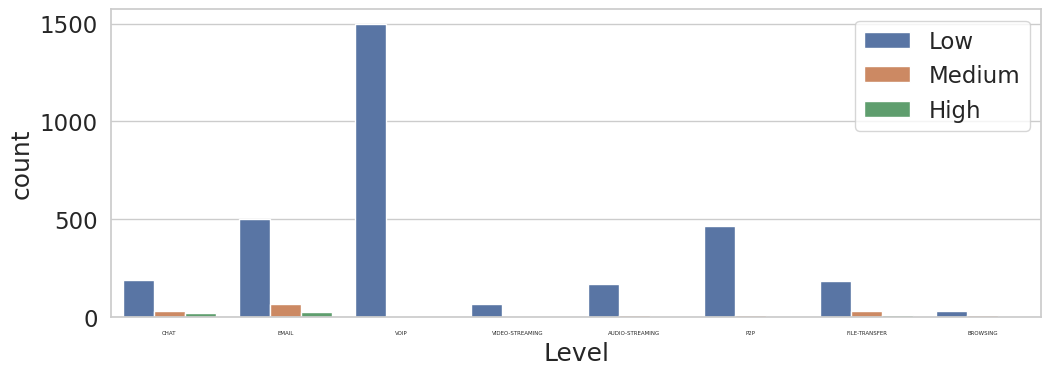

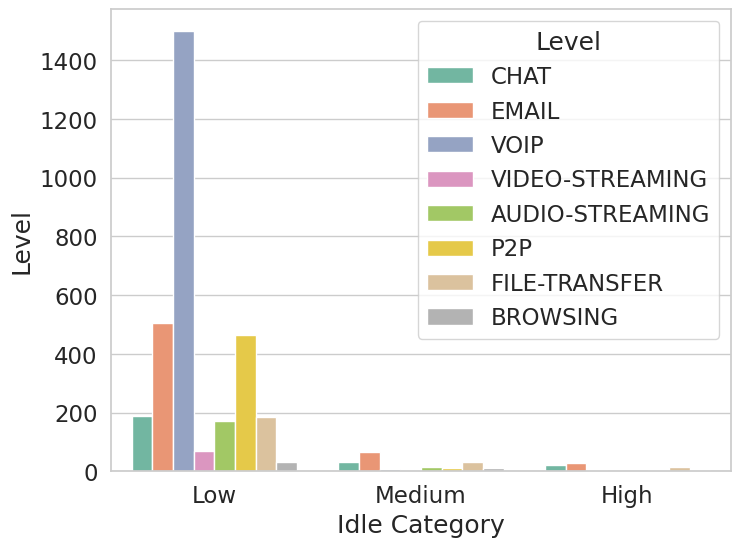

In [ ]:
g = sns.countplot(x='level', hue='idle_category', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Level", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
#g.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xticks(fontsize=4)

plt.figure(figsize=(8, 6))
sns.countplot(x='idle_category', hue='level', data=train, palette='Set2')
plt.xlabel('Idle Category')
plt.ylabel('Level')
plt.legend(title='Level', loc='upper right', labels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'CHAT'),
  Text(1, 0, 'VIDEO-STREAMING'),
  Text(2, 0, 'VOIP'),
  Text(3, 0, 'P2P'),
  Text(4, 0, 'EMAIL'),
  Text(5, 0, 'FILE-TRANSFER'),
  Text(6, 0, 'BROWSING'),
  Text(7, 0, 'AUDIO-STREAMING')])

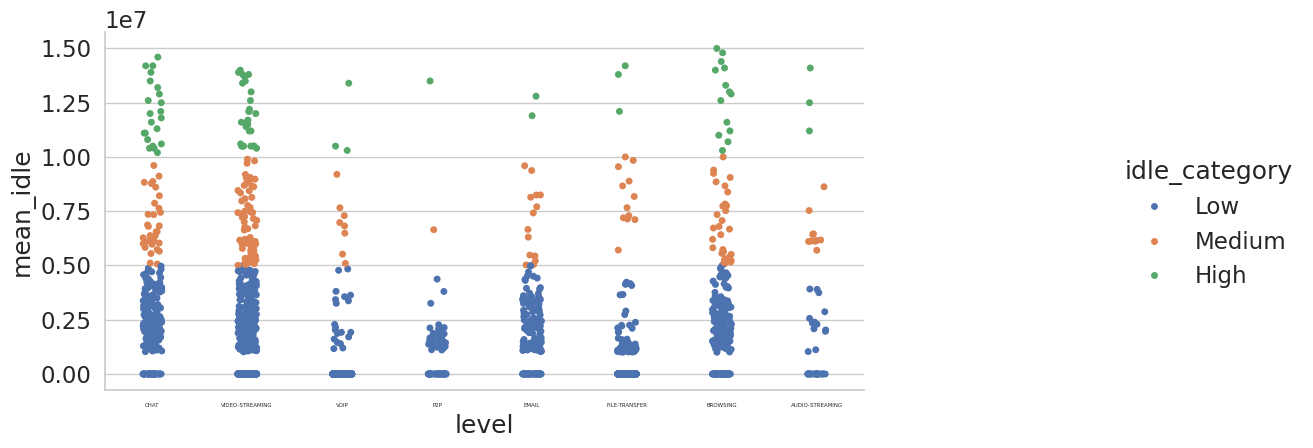

In [ ]:
g = sns.catplot(y="mean_idle", x="level", hue="idle_category", data=train)

new_labels = ['Low', 'Medium', 'High']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)
plt.xticks(fontsize=4)

In [ ]:
idle_pivot_table = train.pivot_table(index='level', columns='idle_category', aggfunc='size')

idle_pivot_table

<ipython-input-156-0de3f145c9d9>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  idle_pivot_table = train.pivot_table(index='level', columns='idle_category', aggfunc='size')


idle_category,Low,Medium,High
level,,,
AUDIO-STREAMING,33,10,3
BROWSING,183,30,14
CHAT,189,32,22
EMAIL,170,14,2
FILE-TRANSFER,465,12,3
P2P,69,1,1
VIDEO-STREAMING,504,66,28
VOIP,1498,8,3


One interesting thing of note is how browsing has a pretty dense amount of low categories of idle. Video streaming also does not have as dense of a medium category as it does in active categories.

#Data Preprocessing and Model Testing

With the visualation that we have, we will now try out various models and see which one will provide the most accurate results. The primary models I plan on using our K Nearest Neighbor, Gaussian Naive Bayes, and Linear Discriminant Analysis.

First, I will test out the models with their default settings. After that, I will then apply some regularization (or regularization-like) techniques to improve performance.

## Before Regularization
The following code will show our three models' performance before any regularization has been done.

In [ ]:
data = train

#Encoding Variables
encoder = LabelEncoder()
data['fiat_category'] = encoder.fit_transform(train['fiat_category'])
data['biat_category'] = encoder.fit_transform(train['biat_category'])
data['flowiat_category'] = encoder.fit_transform(train['flowiat_category'])
data['active_category'] = encoder.fit_transform(train['active_category'])
data['idle_category'] = encoder.fit_transform(train['idle_category'])
data['duration_category'] = encoder.fit_transform(train['duration_category'])

#Define our features and target
X = data.drop('level', axis=1)
y = data['level']

#Balancing features using different balancing techniques.
#Using SMOTE to generate more samples for lowest represented levels
smote_balance = SMOTE(sampling_strategy = {'P2P': 750, 'AUDIO-STREAMING': 750}, random_state = 42)

#Using random oversampling for mid-level represented levels
randomOver_balancer = RandomOverSampler(sampling_strategy = {'EMAIL': 400, 'BROWSING': 350, 'CHAT': 550}, random_state = 42)

#Using random undersampling for the more heavily skewed level
randomUnder_balancer = RandomUnderSampler(sampling_strategy = {'VOIP': 900}, random_state = 42)

#use a pipeline to apply all our balancing techniques together
pipeline = Pipeline(steps=[('smote_balance', smote_balance), ('randomOver_balancer', randomOver_balancer), ('randomUnder_balancer', randomUnder_balancer)])

X_balanced, y_balanced = pipeline.fit_resample(X, y)

#Generate training and testing data based on balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.2, random_state = 42)

#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train our models
neighborModel = KNeighborsClassifier()
naiveModel = GaussianNB()
linearModel = LinearDiscriminantAnalysis()

neighborModel.fit(X_train, y_train)
naiveModel.fit(X_train, y_train)
linearModel.fit(X_train, y_train)

#Predictions for models
y1_pred = neighborModel.predict(X_test)
y2_pred = naiveModel.predict(X_test)
y3_pred = linearModel.predict(X_test)
#Evaluate our models
neighborAccuracy = accuracy_score(y_test, y1_pred)
naiveAccuracy = accuracy_score(y_test, y2_pred)
linearAccuracy = accuracy_score(y_test, y3_pred)

neighborPrecision = precision_score(y_test, y1_pred, average='macro')
naivePrecision = precision_score(y_test, y2_pred, average='macro')
linearPrecision = precision_score(y_test, y3_pred, average='macro')

neighborRecall = recall_score(y_test, y1_pred, average='macro')
naiveRecall = recall_score(y_test, y2_pred, average='macro')
linearRecall = recall_score(y_test, y3_pred, average='macro')

neighborF1 = f1_score(y_test, y1_pred, average='macro')
naiveF1 = f1_score(y_test, y2_pred, average='macro')
linearF1 = f1_score(y_test, y3_pred, average='macro')

print("----------Accuracy----------")
print(f"K Nearest Neighbor Accuracy: {neighborAccuracy: .2f}")
print(f"Gaussian Naive Bayes Accuracy: {naiveAccuracy: .2f}")
print(f"Linear Discriminant Accuracy: {linearAccuracy: .2f}")

print("----------Precision----------")
print(f"K Nearest Neighbor Precision: {neighborPrecision: .2f}")
print(f"Gaussian Naive Bayes Precision: {naivePrecision: .2f}")
print(f"Linear Discriminant Precision: {linearAccuracy: .2f}")

print("----------Recall----------")
print(f"K Nearest Neighbor Recall: {neighborRecall: .2f}")
print(f"Guassian Naive Bayes Recall: {naiveRecall: .2f}")
print(f"Linear Discriminant Recall: {linearRecall: .2f}")

print("----------F1 Score----------")
print(f"K Nearest Neighbor F1: {neighborF1: .2f}")
print(f"Gaussian Naive Bayes F1: {naiveF1: .2f}")
print(f"Linear Discriminant F1: {linearF1: .2f}")

----------Accuracy----------
K Nearest Neighbor Accuracy:  0.80
Gaussian Naive Bayes Accuracy:  0.53
Linear Discriminant Accuracy:  0.65
----------Precision----------
K Nearest Neighbor Precision:  0.74
Gaussian Naive Bayes Precision:  0.59
Linear Discriminant Precision:  0.65
----------Recall----------
K Nearest Neighbor Recall:  0.75
Guassian Naive Bayes Recall:  0.42
Linear Discriminant Recall:  0.60
----------F1 Score----------
K Nearest Neighbor F1:  0.74
Gaussian Naive Bayes F1:  0.41
Linear Discriminant F1:  0.58


As we can see, overall KNN is the best model for this dataset. It has the best scores in all four categories when compared to Gaussian Naive Bayes and Linear Discriminant Analysis. In the next section of code, regularization techniques will be applied to all 3 models to see which one is the best.

## Confusion Matrix Before Regularization

We will now make confusion matrices for our models.

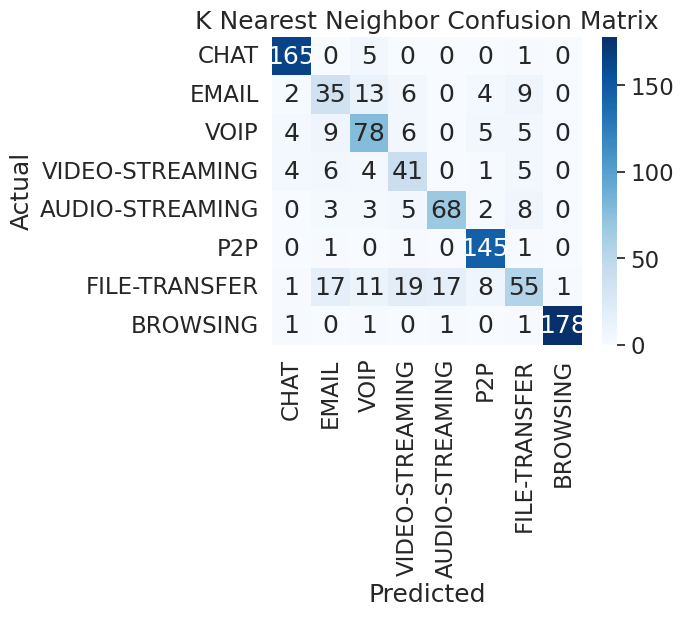

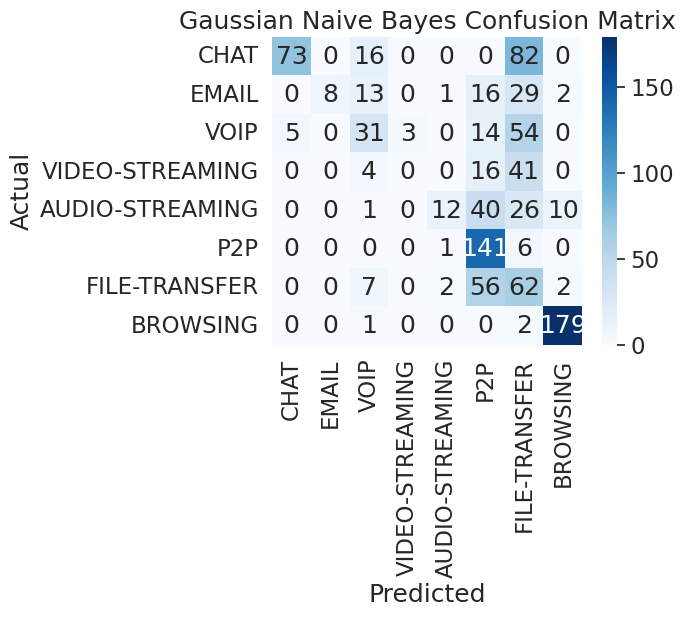

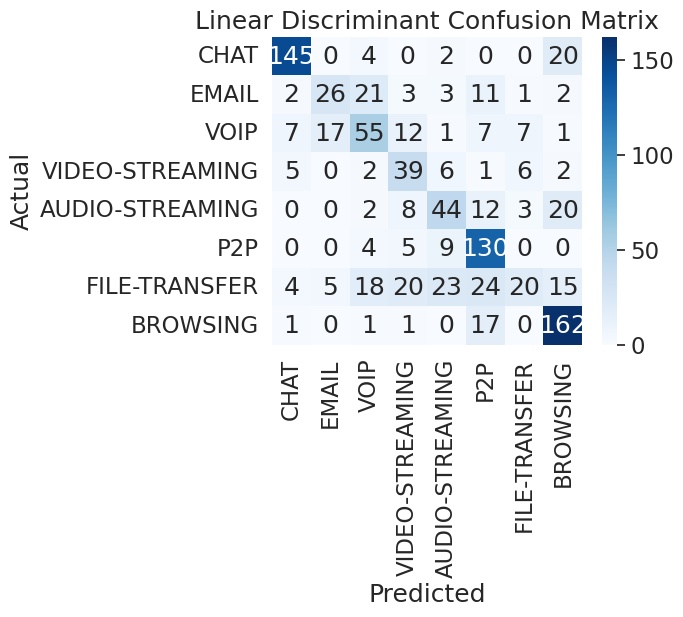

In [ ]:
# Confusion matrix visualization for K nearest Neighbor
cm1 = confusion_matrix(y_test, y1_pred)
cm2 = confusion_matrix(y_test, y2_pred)
cm3 = confusion_matrix(y_test, y3_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'], yticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K Nearest Neighbor Confusion Matrix")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'], yticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'], yticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Discriminant Confusion Matrix")
plt.show()



As we can see in the confusion matrices above, the KNN model is the best model for this dataset. It has the strongest diagonal line, showing that it has the most accurate predictions. Gaussian Naive Bayes has the weakest accuracy, with the diagonal line not being complete. Linear Discriminant Analysis has the second best diagonal line, but there are areas of it that are not as strong as KNN, such as how it missed more VoIP and email predictions.

With this, KNN is the best model to use before regularization, and will be tested for overfitting and underfitting.

## Overfitting and Underfitting Testing Before Regularization

To test out if the KNN model before regularization has any overfitting and underfitting, we will be doing cross validation testing using k-folds. By using k-fold cross examination on our model, we can see what the score would be on different sections of the data. This can be useful to see how the model would perform when given different amounts of data. After that, we will then do average accuracy scores on the training and test data. With this data, we should have a good amount of information regarding our model and potential overfitting or underfitting

In [ ]:
#Look at cross validation testing on 5 folds of our data set. We will then print each score on the folds, as well as the average score.
testing = cross_val_score(neighborModel, X_train, y_train, cv=5)

print(f"Cross validation tests: {testing}")
print(f"Average score: {testing.mean(): .2f}")

Cross validation tests: [0.78039216 0.78039216 0.78272251 0.76963351 0.7434555 ]
Average score:  0.77


As we can see, the average score is 77%. In general the scores are close to our KNN model's accuracy score, but lower slightly. the lowest one is the last test with 74%. This shows that there is a slight chance of overfitting in the KNN model.

We will now compare the averages on our training and test datasets and compare them to our cross validation tests.

In [ ]:
#Look at average accuracy score on our training data
average_train_accuracy = neighborModel.score(X_train, y_train)

print(f'Average Training Set Accuracy: {average_train_accuracy: .2f}')

#Look at average accuracy score on our test data
average_test_accuracy = neighborModel.score(X_test, y_test)

print(f'Average Test Set Accuracy: {average_test_accuracy: .2f}')

Average Training Set Accuracy:  0.86
Average Test Set Accuracy:  0.80


| Average Training Accuracy | Average Cross-Validation Accuracy | Average Test Accuracy |
|-------------------|----------------|-------------|
| 86% | 77% | 80% |

As we can see, the training accuracy is at 86%. This shows that our model has a very good, but not perfect, understanding of the training data. However, this is much lower than the cross-validation score of 77% as well as the test score of 80%. With this in mind, it looks like there is a decent chance of overfitting in the KNN model before regularization.

## After Regularization

We will now apply regularization techniques to try to improve our models. While models like KNN and Gaussian Naive Bayes don't have typical regularization techniques like lasso, ridge, and elastinet, we can still apply some strategies similar to regularization, like increasing the number of neighbors considered and adding variable smoothing.

In [ ]:
data = train

#Encoding Variables
encoder = LabelEncoder()
data['fiat_category'] = encoder.fit_transform(train['fiat_category'])
data['biat_category'] = encoder.fit_transform(train['biat_category'])
data['flowiat_category'] = encoder.fit_transform(train['flowiat_category'])
data['active_category'] = encoder.fit_transform(train['active_category'])
data['idle_category'] = encoder.fit_transform(train['idle_category'])
data['duration_category'] = encoder.fit_transform(train['duration_category'])

#Define our features and target
X = data.drop('level', axis=1)
y = data['level']

#Balancing features using different balancing techniques.
#Using SMOTE to generate more samples for lowest represented levels
smote_balance = SMOTE(sampling_strategy = {'P2P': 750, 'AUDIO-STREAMING': 750}, random_state = 42)

#Using random oversampling for mid-level represented levels
randomOver_balancer = RandomOverSampler(sampling_strategy = {'EMAIL': 400, 'BROWSING': 350, 'CHAT': 550}, random_state = 42)

#Using random undersampling for the more heavily skewed level
randomUnder_balancer = RandomUnderSampler(sampling_strategy = {'VOIP': 900}, random_state = 42)

#use a pipeline to apply all our balancing techniques together
pipeline = Pipeline(steps=[('smote_balance', smote_balance), ('randomOver_balancer', randomOver_balancer), ('randomUnder_balancer', randomUnder_balancer)])

X_balanced, y_balanced = pipeline.fit_resample(X, y)

#Generate training and testing data based on balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.2, random_state = 42)

#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train our models
#While KNN does not allow for traditional regularization, we will apply some techniques that could be similar to regularization, such as increasing the number of neighbors, and setting the metric to l1
neighborModel = KNeighborsClassifier(n_neighbors = 20, algorithm = 'kd_tree', metric='l1', p=2, weights='distance')
#For Gaussian Naive Bayes, we will use some variable smoothing to try to improve performance. Much like KNN, traditional regularization techniques can't really be done
naiveModel = GaussianNB(var_smoothing = 0.000000009)
#We will also use Linear Discriminant Analysis. To allow for some regularization, we will use shrinkage.
linearModel = LinearDiscriminantAnalysis(tol=0.07, solver='lsqr', shrinkage=0.000000001)

neighborModel.fit(X_train, y_train)
naiveModel.fit(X_train, y_train)
linearModel.fit(X_train, y_train)

#Predictions for models
y1_pred = neighborModel.predict(X_test)
y2_pred = naiveModel.predict(X_test)
y3_pred = linearModel.predict(X_test)
#Evaluate our models
neighborAccuracy = accuracy_score(y_test, y1_pred)
naiveAccuracy = accuracy_score(y_test, y2_pred)
linearAccuracy = accuracy_score(y_test, y3_pred)

neighborPrecision = precision_score(y_test, y1_pred, average='macro')
naivePrecision = precision_score(y_test, y2_pred, average='macro')
linearPrecision = precision_score(y_test, y3_pred, average='macro')

neighborRecall = recall_score(y_test, y1_pred, average='macro')
naiveRecall = recall_score(y_test, y2_pred, average='macro')
linearRecall = recall_score(y_test, y3_pred, average='macro')

neighborF1 = f1_score(y_test, y1_pred, average='macro')
naiveF1 = f1_score(y_test, y2_pred, average='macro')
linearF1 = f1_score(y_test, y3_pred, average='macro')

print("----------Accuracy----------")
print(f"K Nearest Neighbor Accuracy: {neighborAccuracy: .2f}")
print(f"Gaussian Naive Bayes Accuracy: {naiveAccuracy: .2f}")
print(f"Linear Discriminant Accuracy: {linearAccuracy: .2f}")

print("----------Precision----------")
print(f"K Nearest Neighbor Precision: {neighborPrecision: .2f}")
print(f"Gaussian Naive Bayes Precision: {naivePrecision: .2f}")
print(f"Linear Discriminant Precision: {linearAccuracy: .2f}")

print("----------Recall----------")
print(f"K Nearest Neighbor Recall: {neighborRecall: .2f}")
print(f"Guassian Naive Bayes Recall: {naiveRecall: .2f}")
print(f"Linear Discriminant Recall: {linearRecall: .2f}")

print("----------F1 Score----------")
print(f"K Nearest Neighbor F1: {neighborF1: .2f}")
print(f"Gaussian Naive Bayes F1: {naiveF1: .2f}")
print(f"Linear Discriminant F1: {linearF1: .2f}")

----------Accuracy----------
K Nearest Neighbor Accuracy:  0.86
Gaussian Naive Bayes Accuracy:  0.53
Linear Discriminant Accuracy:  0.65
----------Precision----------
K Nearest Neighbor Precision:  0.82
Gaussian Naive Bayes Precision:  0.57
Linear Discriminant Precision:  0.65
----------Recall----------
K Nearest Neighbor Recall:  0.83
Guassian Naive Bayes Recall:  0.43
Linear Discriminant Recall:  0.60
----------F1 Score----------
K Nearest Neighbor F1:  0.82
Gaussian Naive Bayes F1:  0.43
Linear Discriminant F1:  0.58


As we can see, and much like before regularization, K Nearest Neighbor is the best model overall. It has scored the highest scores in Accuracy, Precision, Recall, and F1. Not only that, but it's scores have improved compared to how they were before regularization. The second best model used is still Linear Discrimant, as it scored the second best scores overall. However, it's scores see no improvement after applying regularization techniques to them. In last place is Gaussian Naive Bayes. Interestingly though, while Gaussian Naive Bayes' accuracy remained the same, precision decreased by one point, but recall and F1 improved slightly.

In regards to accuracy, KNN has the highest accuracy, meaning that most of it's predictions are correct. Linear disciminant has the second best accuracy, and Naive Bayes is at third. With this in mind KNN is more likely to have a correct prediction than the other models.

For precision, KNN is also the highest, with Linear Discriminant in second, and Naive Bayes in third. With this, it shows that our KNN model has the lowest chance of false positives.

Recall is also where KNN is the highest, and Linear Discriminant in second, and Naive Bayes in third. This shows us that KNN is less likely to have positive predictions, and less likely to have false negative predictions.

Finally, the F1 score is highest for KNN, then Linear Discriminant, and finally Naive Bayes. This shows us that KNN has the best balance of precision and recall overall for our dataset.

With this in mind, K Nearest Neighbor is the best model for this dataset.

## Confusion Matrix After Regularization

We will now make confusion matrices based on each of our models

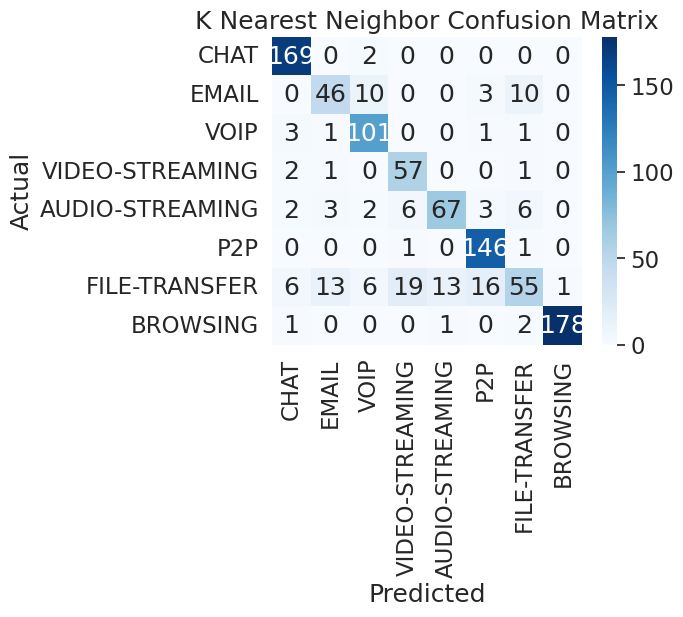

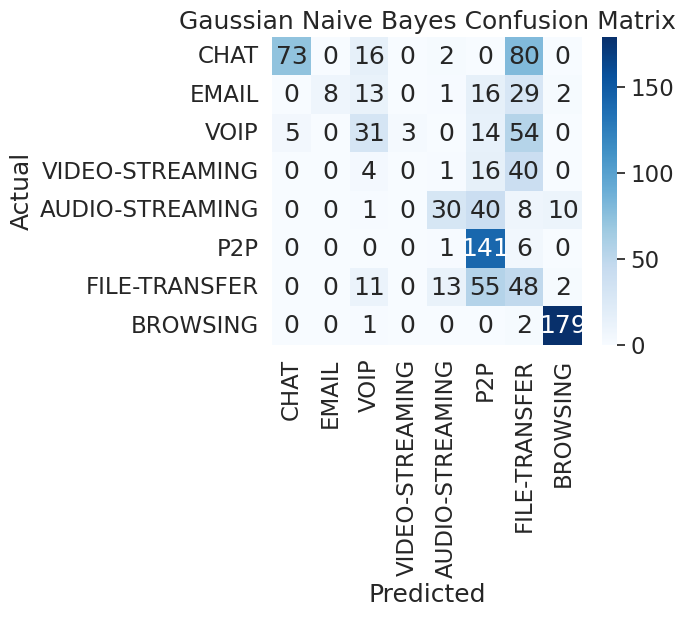

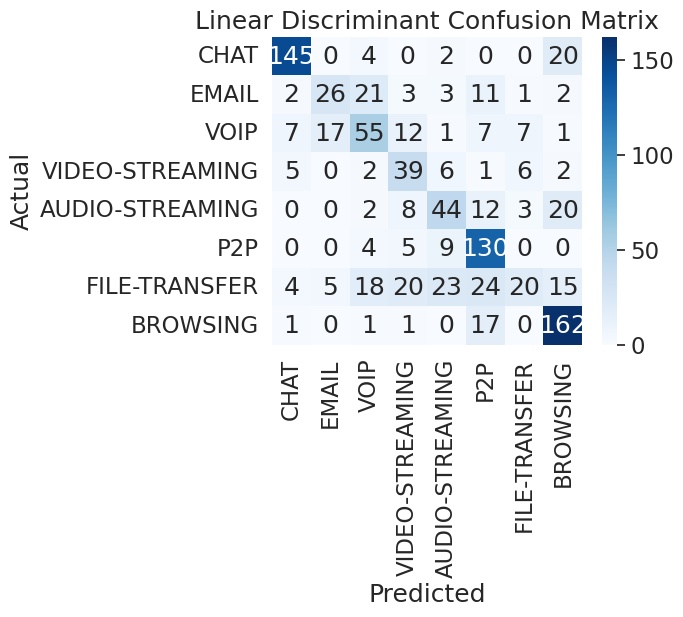

In [ ]:
# Confusion matrix visualization for K nearest Neighbor
cm1 = confusion_matrix(y_test, y1_pred)
cm2 = confusion_matrix(y_test, y2_pred)
cm3 = confusion_matrix(y_test, y3_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'], yticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K Nearest Neighbor Confusion Matrix")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'], yticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'], yticklabels=['CHAT', 'EMAIL','VOIP', 'VIDEO-STREAMING', 'AUDIO-STREAMING','P2P','FILE-TRANSFER', 'BROWSING'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Discriminant Confusion Matrix")
plt.show()



The confusion matrices above perfectly demonstrate how each model is in regards to accuracy. K nearest neighbor is the best one, as demonstrated above, having the best possible accuracy, with the majority of predictions being accurate, with only some mis-classifications. This is shown visually through the clear diagonal line that shows that, majority of the time, what the K nearest neighbor model predicted was the actual result. Compared to the classification matrix for KNN before regularization, there is definitely an improvement. For example, while the KNN model was only able to predict correctly 78 VoIPs, the KNN model after regularization techniques was able to correctly predict 101 VoIPs

Gaussian Naive Bayes has the weakest accuracy. Visually, we can see that, unlike K nearest neighbor, Naive Bayes does not have a strong diagonal line. While there is a noticeable diagonal, it is not complete. This can be seen in video streaming, with how it only got 1 video streaming prediction right, but predicted wrong most of the time. There also is not much improvement to this matrix after regularization.

Linear Discriminant Model is the second best accuracy wise. The diagonal line in the confusion matrix is much stronger than what is seen in Naive Bayes. However, compared to K nearest neighbor, it is not as strong of a diagonal. KNN got more accurate predictions on video streaming and file transfer compared to Linear Discriminant. After regularization, there was not a lot of improvement.

With all of this in mind, K Nearest Neighbor is the best model for this dataset, and the one I choose. After regularization, KNN's performance has improved dramatically.

## Overfitting and Underfitting Testing After Regularization

To test out if the model has any overfitting and underfitting, we will be doing cross validation testing using k-folds. By using k-fold cross examination on our model, we can see what the score would be on different sections of the data. This can be useful to see how the model would perform when given different amounts of data. After that, we will then do average accuracy scores on the training and test data. With this data, we should have a good amount of information regarding our model and potential overfitting or underfitting

In [ ]:
#Look at cross validation testing on 5 folds of our data set. We will then print each score on the folds, as well as the average score.
testing = cross_val_score(neighborModel, X_train, y_train, cv=5)

print(f"Cross validation tests: {testing}")
print(f"Average score: {testing.mean(): .2f}")

Cross validation tests: [0.82222222 0.83137255 0.83507853 0.82853403 0.79450262]
Average score:  0.82


As can be seen above, the average score of our cross validation tests is 0.82. Looking at the individual test scores, it can be seen that the majority of scores were between 0.82 and 0.83. The lowest score was the last test at 0.79. Overall, while this is still a good average score, there is likely some overfitting from our model.

We will now compare the averages on our training and test datasets and compare them to our cross validation tests.

In [ ]:
#Look at average accuracy score on our training data
average_train_accuracy = neighborModel.score(X_train, y_train)

print(f'Average Training Set Accuracy: {average_train_accuracy: .2f}')

#Look at average accuracy score on our test data
average_test_accuracy = neighborModel.score(X_test, y_test)

print(f'Average Test Set Accuracy: {average_test_accuracy: .2f}')

Average Training Set Accuracy:  1.00
Average Test Set Accuracy:  0.86


| Average Training Accuracy | Average Cross-Validation Accuracy | Average Test Accuracy |
|-------------------|----------------|-------------|
| 100% | 82% | 86% |

With this, we can see that we have 100% accuracy on our training set. This is a far greater improvement compared to what it was before regularizatio techniques were applied. When we see the average score on our test set, we have 86% accuracy. This is less than what we got on training accuracy score, but makes sense with our previous accuracy score for our test dataset. However, given that our cross validation testing gave us an 82%, this still confirms that there is likely some overfitting on our model. 82% is still a good score, but not as good as the 86% we got before. However, with how this is not a huge change in accuracy, that's a pretty good sign that overfitting has been minimized. With that being said though, all of the scores here are an improvement over the scores before regularization was applied.

## Table comparing overfitting and accuracy before and after regularization

| | Average Training Accuracy | Average Cross-Validation Accuracy | Average Test Accuracy |
|---------|-------------------|----------------|-------------|
|Before Regularization| 86% | 77% | 80% |
|After Regularization| 100% | 82% | 86% |

Overall, after applying regularization-like tuning to our KNN model. We can see a substantial increase in performance and metrics overall. While there may still be some possible overfitting on our model, the percentage of accurate predictions is still better than what it was before regularization.